# Getting started with statsmodels

Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


## Import

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

## Create sample data

In [4]:
np.random.seed(123)
nsample = 50
x = np.linspace(0, 20, nsample)

# Add constant 1, turn into matrix
X = sm.add_constant(x)
# b0: constant, b1: x1 coefficient
beta = [1, 2.5]
# Random error
e = np.random.normal(size=nsample)

y = np.dot(X, beta) + e

In [5]:
sample_df = pd.DataFrame({"y":y, "x1": x})
sample_df.head()

,y,x1
0,-0.085631,0.000000
1,3.017754,0.408163
2,3.323795,0.816327
3,2.554930,1.224490
4,4.503032,1.632653


<Axes: xlabel='x1', ylabel='y'>

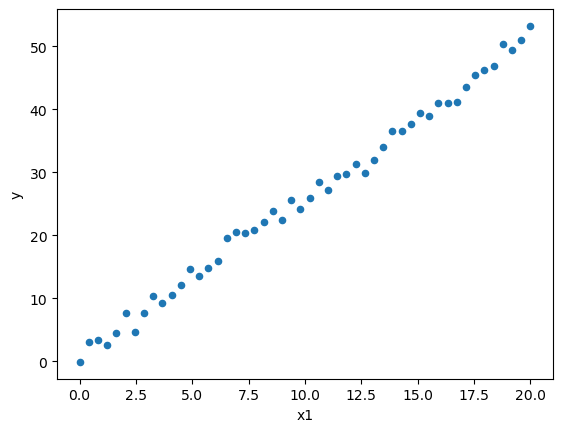

In [6]:
sample_df.plot.scatter("x1", "y")

## Calculate Pearson Coefficients

In [7]:
corr_matrix = sample_df.corr(method='pearson')
print(corr_matrix)

          y       x1
y   1.00000  0.99683
x1  0.99683  1.00000


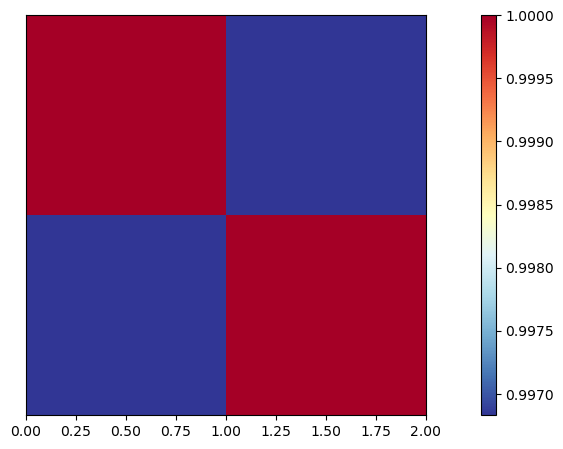

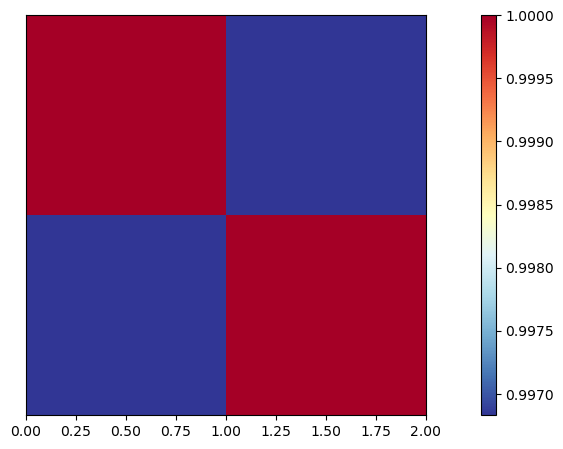

In [8]:
sm.graphics.plot_corr_grid([corr_matrix])

## Simple Linear Regression

In [9]:
y

array([-0.0856306 ,  3.01775361,  3.32379482,  2.55492978,  4.5030324 ,
        7.75347735,  4.69576974,  7.71394451, 10.42920156,  9.31693307,
       10.52519548, 12.12978083, 14.73628759, 13.62640413, 14.84173233,
       15.87177117, 19.53246069, 20.53372486, 20.37140084, 20.7739415 ,
       22.14553184, 23.91930346, 22.51314572, 25.6452168 , 24.23591525,
       25.87245258, 28.43771744, 27.12233971, 29.43135985, 29.73008184,
       31.35662553, 29.83406396, 31.88152812, 33.97359215, 36.62133998,
       36.54065003, 37.73753979, 39.44332475, 38.89597386, 41.07954569,
       41.01096001, 41.1090652 , 43.46624306, 45.45135688, 46.23654823,
       46.90653685, 50.33114078, 49.37209583, 50.95832784, 53.23814334])

In [10]:
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.40816327],
       [ 1.        ,  0.81632653],
       [ 1.        ,  1.2244898 ],
       [ 1.        ,  1.63265306],
       [ 1.        ,  2.04081633],
       [ 1.        ,  2.44897959],
       [ 1.        ,  2.85714286],
       [ 1.        ,  3.26530612],
       [ 1.        ,  3.67346939],
       [ 1.        ,  4.08163265],
       [ 1.        ,  4.48979592],
       [ 1.        ,  4.89795918],
       [ 1.        ,  5.30612245],
       [ 1.        ,  5.71428571],
       [ 1.        ,  6.12244898],
       [ 1.        ,  6.53061224],
       [ 1.        ,  6.93877551],
       [ 1.        ,  7.34693878],
       [ 1.        ,  7.75510204],
       [ 1.        ,  8.16326531],
       [ 1.        ,  8.57142857],
       [ 1.        ,  8.97959184],
       [ 1.        ,  9.3877551 ],
       [ 1.        ,  9.79591837],
       [ 1.        , 10.20408163],
       [ 1.        , 10.6122449 ],
       [ 1.        , 11.02040816],
       [ 1.        ,

In [11]:
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7535.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.97e-54
Time:                        14:27:40   Log-Likelihood:                -79.405
No. Observations:                  50   AIC:                             162.8
Df Residuals:                      48   BIC:                             166.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8224      0.337      2.442      0.0

In [12]:
result.params

array([0.82244348, 2.5190828 ])

## Plot regression

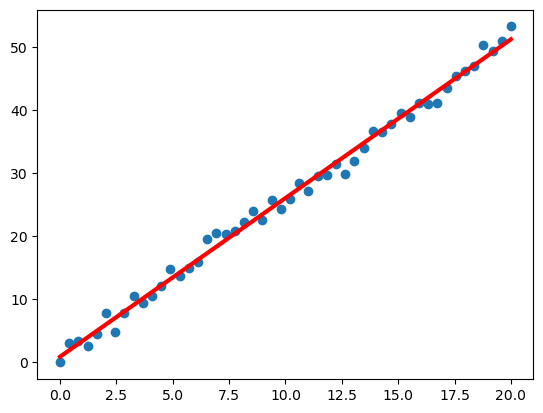

In [13]:
import matplotlib.pyplot as plt

# Plot observed points
plt.scatter(x, y)

# Get Slope and Constant (intercept)
b0, b1 = result.params[0], result.params[1]

# draw  regression line
plt.plot(x, b0 + b1*x, color='red', lw = 3)

## Plot regression

In [15]:
# Make predictions
X_new = np.array([[0], [2]])  # New data points to predict
X_new_with_const = sm.add_constant(X_new)
predictions = result.predict(X_new_with_const)
print("Predictions for new data points:")
print(predictions)

Predictions for new data points:
[0.82244348 5.86060907]
